Plot saved as performance_plot.png


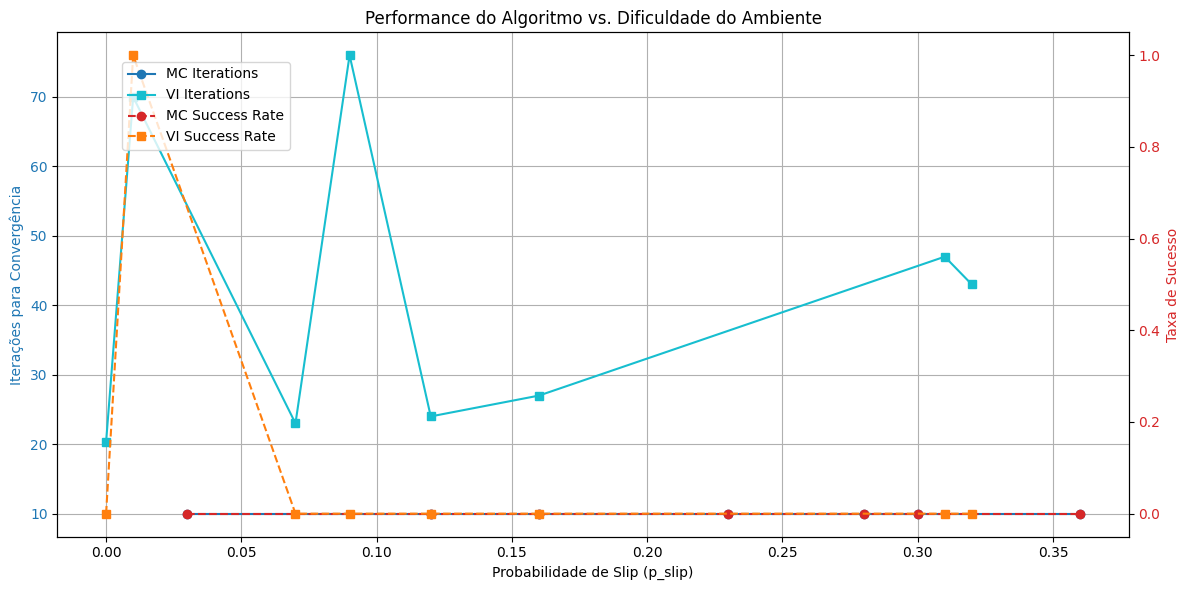

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
mc_df = pd.read_csv('mc_experiments.csv')
vi_df = pd.read_csv('vi_experiments.csv')

# Process Monte Carlo data
mc_grouped = mc_df.groupby('wind_slip').agg(
    avg_iterations=('episodes', 'mean'),
    success_rate=('replay_delivered', lambda x: x.mean())
).reset_index()

# Process Value Iteration data
vi_grouped = vi_df.groupby('wind_slip').agg(
    avg_iterations=('vi_iterations', 'mean'),
    success_rate=('replay_delivered', lambda x: x.mean())
).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot iterations for both algorithms on the primary y-axis
ax1.plot(mc_grouped['wind_slip'], mc_grouped['avg_iterations'], 'o-', label='MC Iterations', color='tab:blue')
ax1.plot(vi_grouped['wind_slip'], vi_grouped['avg_iterations'], 's-', label='VI Iterations', color='tab:cyan')
ax1.set_xlabel('Probabilidade de Slip (p_slip)')
ax1.set_ylabel('Iterações para Convergência', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Create a secondary y-axis for success rate
ax2 = ax1.twinx()
ax2.plot(mc_grouped['wind_slip'], mc_grouped['success_rate'], 'o--', label='MC Success Rate', color='tab:red')
ax2.plot(vi_grouped['wind_slip'], vi_grouped['success_rate'], 's--', label='VI Success Rate', color='tab:orange')
ax2.set_ylabel('Taxa de Sucesso', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and legend
plt.title('Performance do Algoritmo vs. Dificuldade do Ambiente')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Save the plot
plt.savefig('performance_plot.png')

print("Plot saved as performance_plot.png")
